In [11]:
import numpy as np,pandas as pd
from datetime import date
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]

In [2]:
colist = ['eventid','iyear','country_txt','region_txt','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','natlty1_txt','natlty2_txt','natlty3_txt','attacktype1_txt','targtype1_txt','attacktype2_txt','targtype2_txt','targtype3_txt']
ter70_91 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd_70to91_49566.csv",usecols=colist)
ter92_11 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd_92to11_no 93_55072.csv",usecols=colist)
ter93 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd1993_748.csv",usecols=colist)
ter12_15 = pd.read_csv("D:\\Manipal Pro learn\\Term1\\EDA\\Dataset\\data-society-global-terrorism-data\\original\\gtd_12to15_52134.csv",usecols=colist)
ter = ter70_91.append(ter92_11).append(ter93).append(ter12_15)
ter = ter.fillna(0)
ter.head()

,eventid,iyear,country_txt,region_txt,attacktype1_txt,attacktype2_txt,targtype1_txt,natlty1_txt,targtype2_txt,natlty2_txt,targtype3_txt,natlty3_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Assassination,.,Private Citizens & Property,Dominican Republic,.,.,.,.,1.0,0.0,0.0,0.0,0.0,0.0
1,197000000002,1970,Mexico,North America,Hostage Taking (Kidnapping),.,Government (Diplomatic),Belgium,.,.,.,.,0.0,0.0,0.0,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Assassination,.,Journalists & Media,United States,.,.,.,.,1.0,0.0,0.0,0.0,0.0,0.0
3,197001000002,1970,Greece,Western Europe,Bombing/Explosion,.,Government (Diplomatic),United States,.,.,.,.,0.0,0.0,0.0,0.0,0.0,0.0
4,197001000003,1970,Japan,East Asia,Facility/Infrastructure Attack,.,Government (Diplomatic),United States,.,.,.,.,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
casualititesbyyear = ter[['iyear','nkill','nwound']].groupby('iyear').sum().reset_index()
casualititesbyyear['casualities'] = casualititesbyyear['nkill'] + casualititesbyyear['nwound']
casualititesbyyear.head()

,iyear,nkill,nwound,casualities
0,1970,171.0,192.0,363.0
1,1971,173.0,82.0,255.0
2,1972,566.0,222.0,788.0
3,1973,370.0,495.0,865.0
4,1974,542.0,754.0,1296.0


In [4]:
#proof1-no.of incidents
terbyyear = ter[['eventid','iyear']].groupby('iyear').count().reset_index()
terbyyear.head()

,iyear,eventid
0,1970,651
1,1971,470
2,1972,494
3,1973,473
4,1974,580


In [14]:
casualititesbyyear = casualititesbyyear.rename(columns={'iyear':"Year"})
casualititesbyyear = casualititesbyyear.set_index('Year')
casualititesbyyear = casualititesbyyear[['casualities']]
terbyyear = terbyyear.rename(columns={'eventid':"# of incidents",'iyear':"Year"})
terbyyear = terbyyear.set_index('Year')
terbyyear = terbyyear[['# of incidents']]
casualititestoincidents = casualititesbyyear.join(terbyyear)
casualititestoincidents[['casualities','# of incidents']].plot(kind='line', stacked=False)


KeyError: 'Year'

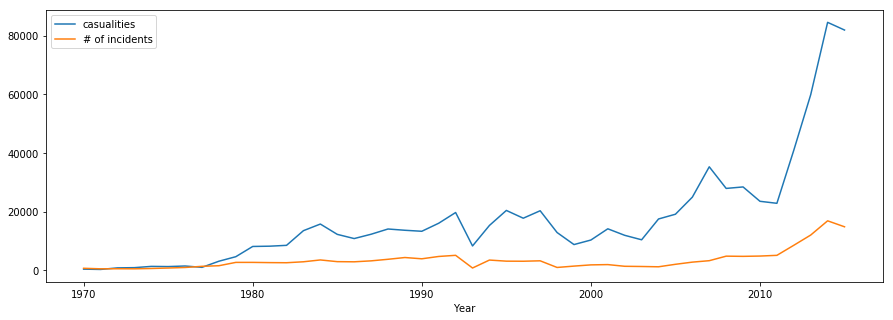

In [15]:
casualititestoincidents[['casualities','# of incidents']].plot(kind='line', stacked=False)
plt.title('')

In [7]:
casualititestoincidents['casualities to incident ratio'] = casualititestoincidents['casualities'] / casualititestoincidents['# of incidents']

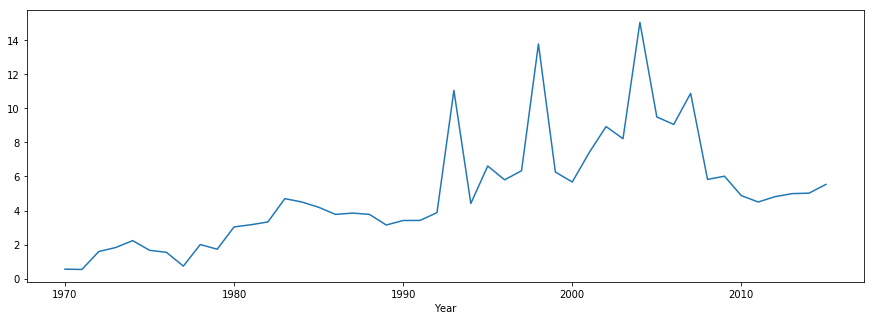

In [12]:
casualititestoincidents['casualities to incident ratio'].plot(kind='line', stacked=False)

In [8]:
casualititestoincidents.head()

,casualities,# of incidents,casualities to incident ratio
Year,,,
1970,363.0,651,0.557604
1971,255.0,470,0.542553
1972,788.0,494,1.595142
1973,865.0,473,1.828753
1974,1296.0,580,2.234483


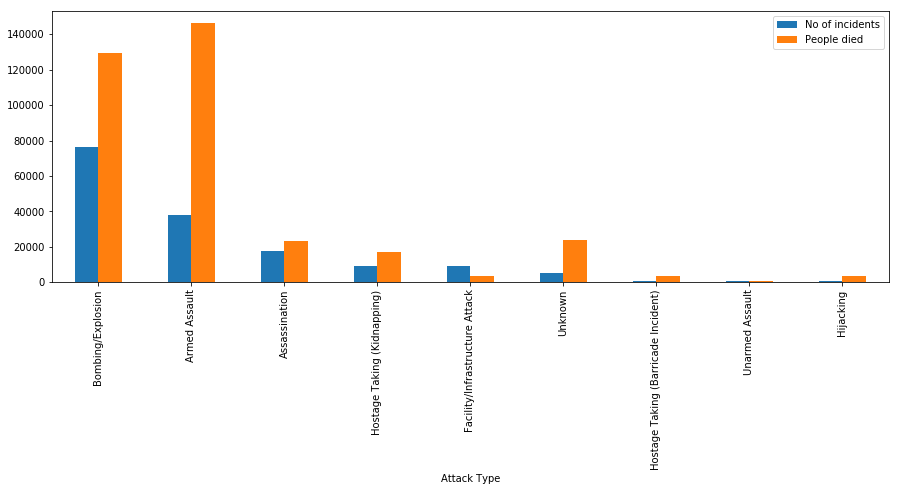

In [16]:
#proof2 attack type

attacktypesbyyear = ter[['attacktype1_txt','eventid']].groupby(['attacktype1_txt']).count().reset_index()
attacktypescount = attacktypesbyyear.sort_values('eventid',ascending = False)
attacktypeskills = ter[['attacktype1_txt','nkill']].groupby(['attacktype1_txt']).sum().reset_index()
attacktypeskills = attacktypeskills.sort_values('nkill',ascending = False)
attacktypescount.insert(2,"kills",attacktypeskills['nkill'])
attacktypescount = attacktypescount.rename(columns = {'attacktype1_txt':'Attack Type','eventid':'No of incidents','kills':'People died' })
attacktypescount = attacktypescount.set_index("Attack Type")
attacktypescount.plot(kind='bar', stacked=False)

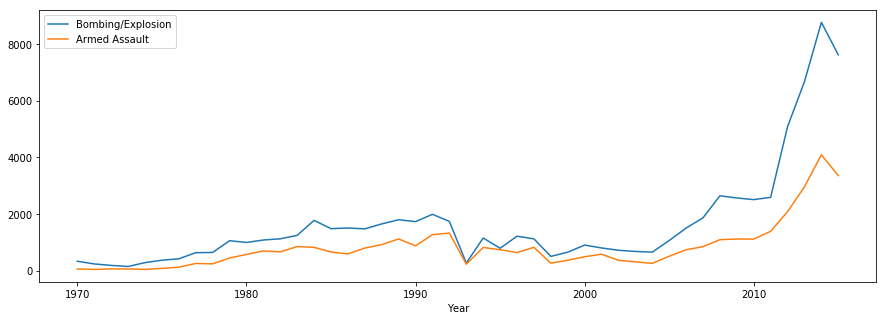

In [40]:
attacktop2 = ter[(ter['attacktype1_txt'] == 'Bombing/Explosion') | (ter['attacktype1_txt'] == 'Armed Assault')]
attacktop2 = attacktop2[['iyear','attacktype1_txt','eventid']]
bombingbyyear = attacktop2[attacktop2['attacktype1_txt'] == 'Bombing/Explosion']
armedassaultbyyear = attacktop2[attacktop2['attacktype1_txt'] == 'Armed Assault']
attbyyear = bombingbyyear[['iyear','eventid']].groupby('iyear').count().reset_index().rename(columns = {'eventid':'Bombing/Explosion','iyear':'Year'})
arms = armedassaultbyyear[['iyear','eventid']].groupby('iyear').count().reset_index().rename(columns = {'eventid':'Armed Assault'})
attbyyear.insert(2,'Armed Assault',arms['Armed Assault'])
attbyyear = attbyyear.set_index('Year')
attbyyear.plot(kind='line',stacked = False)

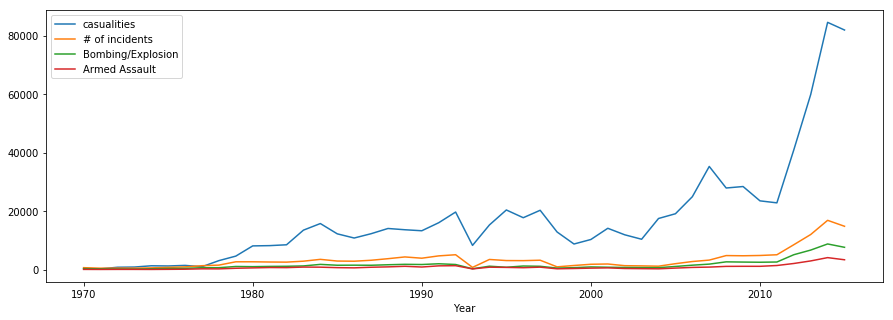

In [44]:
casualititestoincidents.join(attbyyear).plot(kind='line',stacked=False)